In [9]:
#import necessary libraries and Modules
import ImageManipFuncs as IMF
import PlottingFuncs as PF
import ImageAnalysis as IA
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image, ImageDraw
import numpy as np
import math
import os
import ipywidgets as widgets
from IPython.display import display

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png
(1038, 1042)


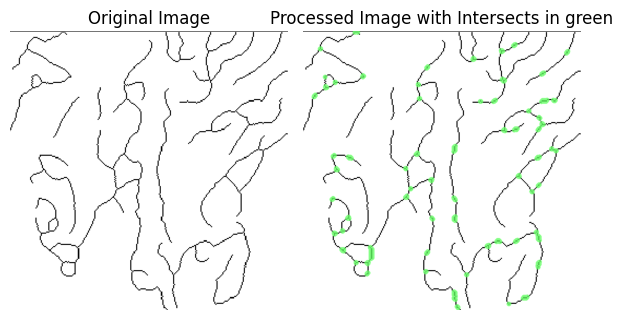

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png
(1038, 1042)


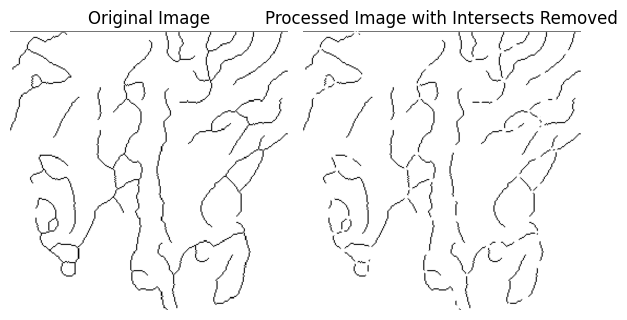

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png


In [2]:
input_image = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1.png'
invert_input = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png'
intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png'

IMF.invert_image(input_image, invert_input)
IA.identify_intersects(invert_input, intersects_removed,dot_size=8,box_size=10, perc = .4, RGBA_color = (100, 255, 100, 200), title = 'Processed Image with Intersects in green')
IA.identify_intersects(invert_input, intersects_removed,dot_size=4,box_size=10, perc = .4, RGBA_color = (255, 255, 255, 255), title = 'Processed Image with Intersects Removed')

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png


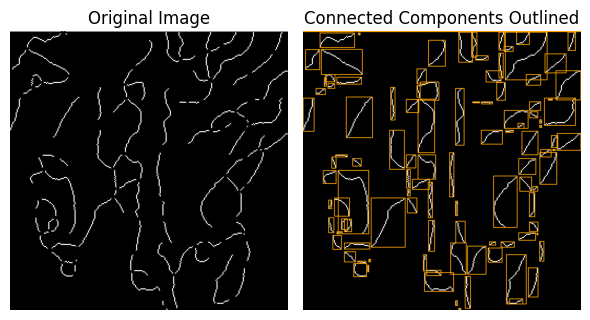

In [3]:
invert_intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png'
IMF.invert_image(intersects_removed ,invert_intersects_removed)
labels, stats = IA.identify_connected_components(invert_intersects_removed)

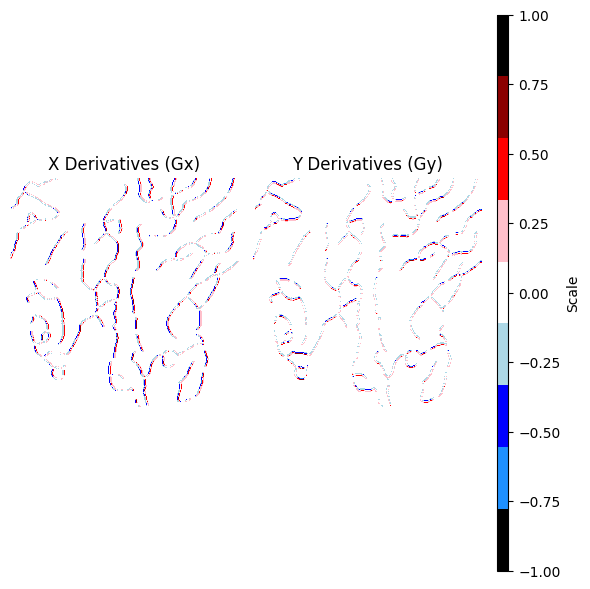

In [4]:
# read the image
img = cv2.imread(intersects_removed)

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)

# apply sobel derivatives
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=3)
PF.plot_sobel_derivatives(sobelx, sobely)

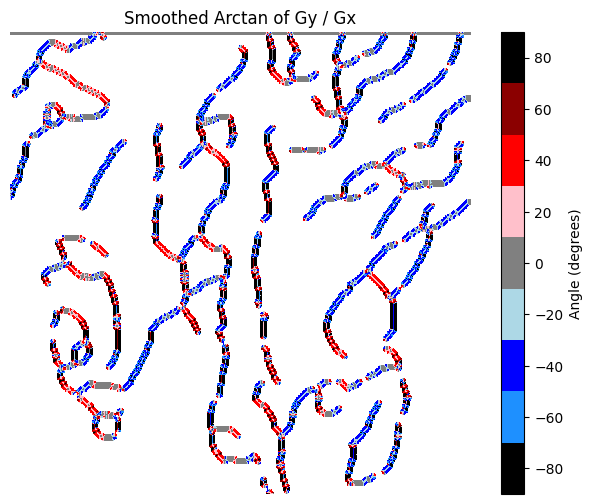

In [13]:
smoothed_angles = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'

smoothed_angle_map = PF.plot_arctan_with_smoothing(sobely, sobelx,invert_intersects_removed, 5, smoothed_angles)

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ipywidgets import Button, HBox, VBox, Output
from IPython.display import display

# Helper functions
def hexagon_corners(center, size):
    x = center[0]
    y = center[1]

    w = math.sqrt(3) * size
    h = 2 * size

    return [
        (x - w / 2, y - h / 4),
        (x, y - h / 2),
        (x + w / 2, y - h / 4),
        (x + w / 2, y + h / 4),
        (x, y + h / 2),
        (x - w / 2, y + h / 4)
    ]

def hexagonify_with_outline(original_image_path, hexagon_size):
    im = Image.open(original_image_path)
    im_copy = im.copy()
    draw = ImageDraw.Draw(im_copy)
    
    w = math.sqrt(3) * hexagon_size
    h = 2 * hexagon_size

    num_hor = int(im.size[0] / w) + 2
    num_ver = int(im.size[1] / h * 4 / 3) + 2

    for i in range(num_hor * num_ver):
        column = i % num_hor
        row = i // num_hor
        even = row % 2

        p = hexagon_corners((column * w + even * w / 2, row * h * 3 / 4), hexagon_size)

        p_clipped = [(int(np.clip(point[0], 0, im.size[0] - 1)), int(np.clip(point[1], 0, im.size[1] - 1))) for point in p]

        draw.polygon(p_clipped, outline="purple")  # Draw hexagon outline with purple color

    return im_copy

def display_images(original_image_path, modified_image):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Display original image
    original_image = Image.open(original_image_path)
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Display modified image
    axs[1].imshow(modified_image)
    axs[1].set_title('Original Image with Hexagon Outlines')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Event handler functions
def update_image():
    global hexagon_size, original_image_path, out
    modified_image = hexagonify_with_outline(original_image_path, hexagon_size)
    with out:
        out.clear_output(wait=True)
        display_images(original_image_path, modified_image)

def on_increase_clicked(b):
    global hexagon_size
    hexagon_size += 1
    update_image()

def on_decrease_clicked(b):
    global hexagon_size
    hexagon_size = max(1, hexagon_size - 1)  # Ensure size does not go below 1
    update_image()

# Main code
if __name__ == "__main__":
    original_image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGSsmoothed_angles.png'
    hexagon_size = 20

    # Create buttons for adjusting hexagon size
    increase_button = Button(description='+')
    decrease_button = Button(description='-')
    
    increase_button.on_click(on_increase_clicked)
    decrease_button.on_click(on_decrease_clicked)
    
    # Display initial images
    out = Output()
    update_image()

    # Display buttons and initial output
    display(VBox([HBox([decrease_button, increase_button]), out]))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jakehoffmann\\Documents\\smoothed_angles.png'